<a href="https://colab.research.google.com/github/Akashsky123/Deep-Learning-Lab/blob/main/Experiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a linearly separable dataset
X, y = make_classification(
    n_samples=200,          # Total number of samples
    n_features=2,           # Number of features
    n_redundant=0,          # Number of redundant features
    n_informative=2,        # Number of informative features
    n_clusters_per_class=1, # Number of clusters per class
    n_classes=2,            # Number of classes (binary classification)
    random_state=42         # For reproducibility
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing
    random_state=42         # For reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (160, 2)
Shape of y_train: (160,)
Shape of X_test: (40, 2)
Shape of y_test: (40,)


In [2]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.w = None  # Weights
        self.b = None  # Bias

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        y_predicted = self.step_function(linear_output)
        return y_predicted

# This code block defines the Perceptron class with its initialization, step_function, and predict method.

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, lr=0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.w = None  # Weights
        self.b = None  # Bias

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Forward propagation
                linear_output = np.dot(x_i, self.w) + self.b
                y_predicted = self.step_function(linear_output)

                # Calculate error
                error = y[idx] - y_predicted

                # Update weights and bias
                self.w += self.lr * error * x_i
                self.b += self.lr * error

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        y_predicted = self.step_function(linear_output)
        return y_predicted

# This code block completes the Perceptron class by adding the fit method, which handles the training process.

In [4]:
model = Perceptron(lr=0.01, epochs=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model training and prediction complete.")

Model training and prediction complete.


In [5]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Model Accuracy: {accuracy:.4f}")

Perceptron Model Accuracy: 0.7750


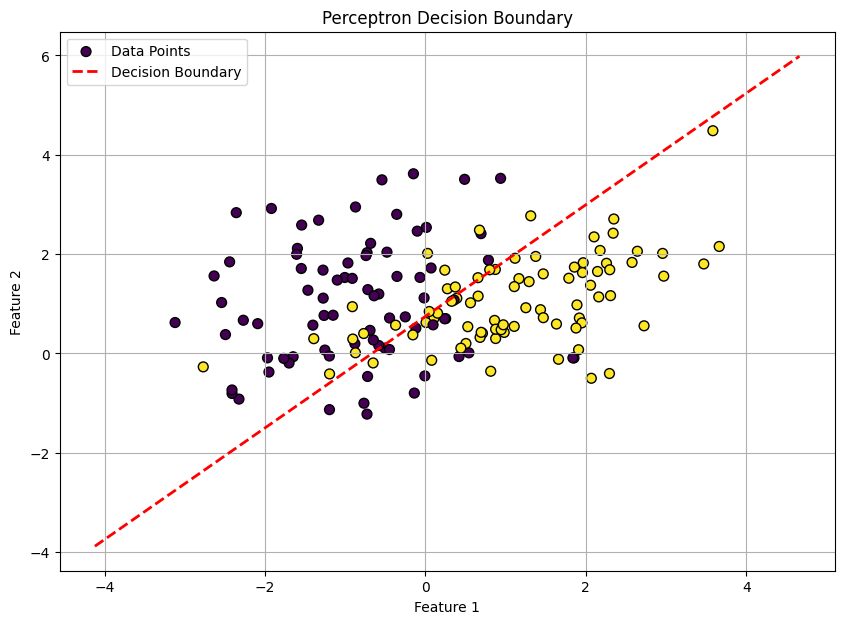

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot of the training data
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, edgecolors='k', label='Data Points')

# Determine the range for the x-axis
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 100)

# Calculate the corresponding y-values for the decision boundary
# The decision boundary is w_0*x_0 + w_1*x_1 + b = 0
# Solving for x_1 (y_vals): x_1 = (-w_0*x_0 - b) / w_1
# Handle the case where w[1] might be zero (vertical decision boundary)
if model.w[1] != 0:
    y_vals = (-model.w[0] * x_vals - model.b) / model.w[1]
    plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label='Decision Boundary')
else:
    # If w[1] is zero, the boundary is a vertical line: w_0*x_0 + b = 0 => x_0 = -b / w_0
    if model.w[0] != 0:
        x_vertical = -model.b / model.w[0]
        plt.axvline(x=x_vertical, color='red', linestyle='--', linewidth=2, label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate a non-linearly separable dataset
X_nl, y_nl = make_circles(
    n_samples=200,          # Total number of samples
    factor=0.5,             # Scale factor between inner and outer circle
    noise=0.05,             # Standard deviation of Gaussian noise added to the data
    random_state=42         # For reproducibility
)

# Split the dataset into training and testing sets
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nl, y_nl,
    test_size=0.2,          # 20% for testing
    random_state=42         # For reproducibility
)

print(f"Shape of X_train_nl: {X_train_nl.shape}")
print(f"Shape of y_train_nl: {y_train_nl.shape}")
print(f"Shape of X_test_nl: {X_test_nl.shape}")
print(f"Shape of y_test_nl: {y_test_nl.shape}")

Shape of X_train_nl: (160, 2)
Shape of y_train_nl: (160,)
Shape of X_test_nl: (40, 2)
Shape of y_test_nl: (40,)


In [8]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer
        # W1: (input_size, hidden_size), b1: (1, hidden_size)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        # Initialize weights and biases for the output layer
        # W2: (hidden_size, output_size), b2: (1, output_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

# This code block defines the NeuralNetwork class with its constructor, and implements the sigmoid activation function and its derivative.

In [9]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer
        # W1: (input_size, hidden_size), b1: (1, hidden_size)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        # Initialize weights and biases for the output layer
        # W2: (hidden_size, output_size), b2: (1, output_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        # Hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)

        # Output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)

        return self.A2

# This code block adds the forward_propagation method to the NeuralNetwork class.

In [10]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer
        # W1: (input_size, hidden_size), b1: (1, hidden_size)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        # Initialize weights and biases for the output layer
        # W2: (hidden_size, output_size), b2: (1, output_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        # Hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)

        # Output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)

        return self.A2

    def backward_propagation(self, X, y, A1, A2):
        m = X.shape[0] # Number of samples

        # Calculate error for output layer
        dZ2 = A2 - y.reshape(A2.shape) # A2 is (m, 1), y needs to be (m, 1)
        dW2 = (1 / m) * np.dot(A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        # Calculate error for hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(A1) # Element-wise multiplication for sigmoid derivative
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

# This code block adds the backward_propagation method to the NeuralNetwork class, which calculates gradients for weights and biases.

In [11]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer
        # W1: (input_size, hidden_size), b1: (1, hidden_size)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        # Initialize weights and biases for the output layer
        # W2: (hidden_size, output_size), b2: (1, output_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        # Hidden layer
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)

        # Output layer
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)

        return self.A2

    def backward_propagation(self, X, y, A1, A2):
        m = X.shape[0] # Number of samples

        # Calculate error for output layer
        dZ2 = A2 - y.reshape(A2.shape) # A2 is (m, 1), y needs to be (m, 1)
        dW2 = (1 / m) * np.dot(A1.T, dZ2)
        db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

        # Calculate error for hidden layer
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(A1) # Element-wise multiplication for sigmoid derivative
        dW1 = (1 / m) * np.dot(X.T, dZ1)
        db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def fit(self, X, y, epochs, lr):
        for epoch in range(epochs):
            # Forward propagation
            A2 = self.forward_propagation(X)

            # Backward propagation
            dW1, db1, dW2, db2 = self.backward_propagation(X, y, self.A1, A2)

            # Update weights and biases
            self.W1 -= lr * dW1
            self.b1 -= lr * db1
            self.W2 -= lr * dW2
            self.b2 -= lr * db2

    def predict(self, X):
        # Perform forward propagation to get output probabilities
        A2 = self.forward_propagation(X)
        # Threshold the probabilities at 0.5 to get binary predictions
        return (A2 >= 0.5).astype(int)

# This code block completes the NeuralNetwork class by adding the fit and predict methods, implementing the training and prediction processes.

In [12]:
input_size = X_train_nl.shape[1]
hidden_size = 4  # Example: 4 hidden units
output_size = 1  # Binary classification

# Instantiate the Neural Network
model_nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the Neural Network
epochs = 10000
lr = 0.1
print(f"Training Neural Network for {epochs} epochs with learning rate {lr}...")
model_nn.fit(X_train_nl, y_train_nl, epochs, lr)
print("Neural Network training complete.")

# Make predictions on the test set
y_pred_nl = model_nn.predict(X_test_nl)
print("Predictions on non-linearly separable data made.")

Training Neural Network for 10000 epochs with learning rate 0.1...
Neural Network training complete.
Predictions on non-linearly separable data made.


In [13]:
from sklearn.metrics import accuracy_score

accuracy_nl = accuracy_score(y_test_nl, y_pred_nl)
print(f"Neural Network Model Accuracy (Non-linear data): {accuracy_nl:.4f}")

Neural Network Model Accuracy (Non-linear data): 0.4500


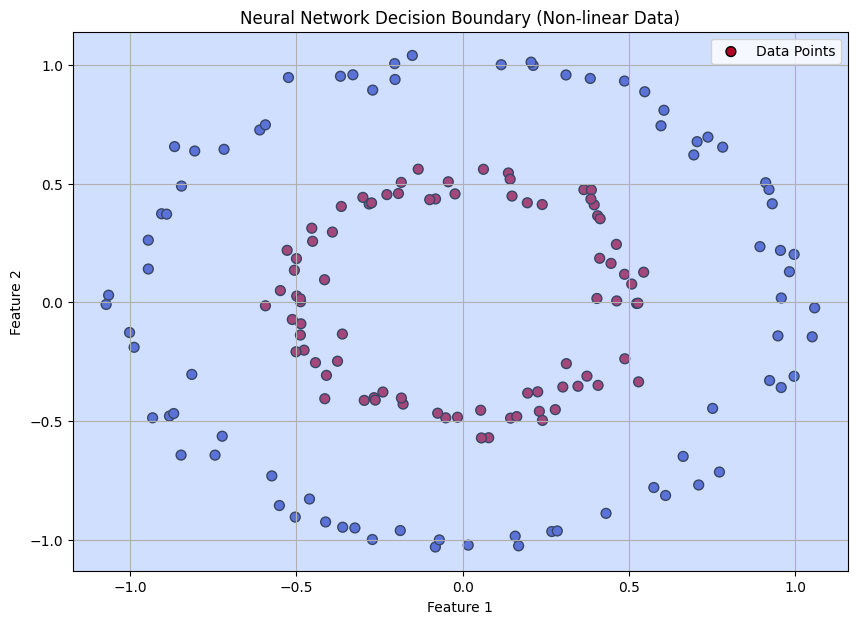

In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot of the training data
plt.figure(figsize=(10, 7))
plt.scatter(X_train_nl[:, 0], X_train_nl[:, 1], c=y_train_nl, cmap='coolwarm', s=50, edgecolors='k', label='Data Points')

# Define the limits for the plot
x_min, x_max = X_train_nl[:, 0].min() - 0.1, X_train_nl[:, 0].max() + 0.1
y_min, y_max = X_train_nl[:, 1].min() - 0.1, X_train_nl[:, 1].max() + 0.1

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict for each point in the meshgrid
Z = model_nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.title('Neural Network Decision Boundary (Non-linear Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()